In [4]:
## we proberen de volgende manier te gebruiken voor het benoemen van onderdelen. Dit komt uit de volgende bron: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

In [13]:
!pip install cbsodata

In [14]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from contextlib import closing
import csv
import cbsodata
import os

In [15]:
# Dataset1_Gezonde_Levensverwachting 

In [16]:
# Laad de dataset
Dataset1_gezondelevensverwachting_vanaf_1981 = pd.read_csv('Gezonde_levensverwachting__vanaf_1981_29012025_112744.csv', sep=';')

In [17]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset1_gezondelevensverwachting_vanaf_198.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset1_gezondelevensverwachting_vanaf_1981.to_sql('Dataset1_gezondelevensverwachting_vanaf_198_table', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


In [18]:
# Dataset 2 Gezonde levens verwachting per aandoening

In [19]:
# Laad de dataset
Dataset2_gezondelevensverwachting_per_aandoening = pd.read_csv('71950ned_TypedDataSet_29012025_112846.csv', sep=';')

In [20]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset2_gezondelevensverwachting_per_aandoening.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset2_gezondelevensverwachting_per_aandoening.to_sql('Dataset2_gezondelevensverwachting_per_aandoening', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


In [21]:
# Dataset 3 Geregistreerde_criminaliteit_Noord_Nederland

In [22]:
# Load the dataset with ';' as the separator
Dataset3_REG_criminaliteit_Noord = pd.read_csv('Geregistreerde_criminaliteit_Noord_Nederland.csv', sep=';')

In [23]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset3_REG_criminaliteit_Noord.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset3_REG_criminaliteit_Noord.to_sql('Dataset3_REG_criminaliteit_Noord', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")


Het CSV-bestand is succesvol omgezet naar een SQL-database.


In [24]:
# Dataset 4 

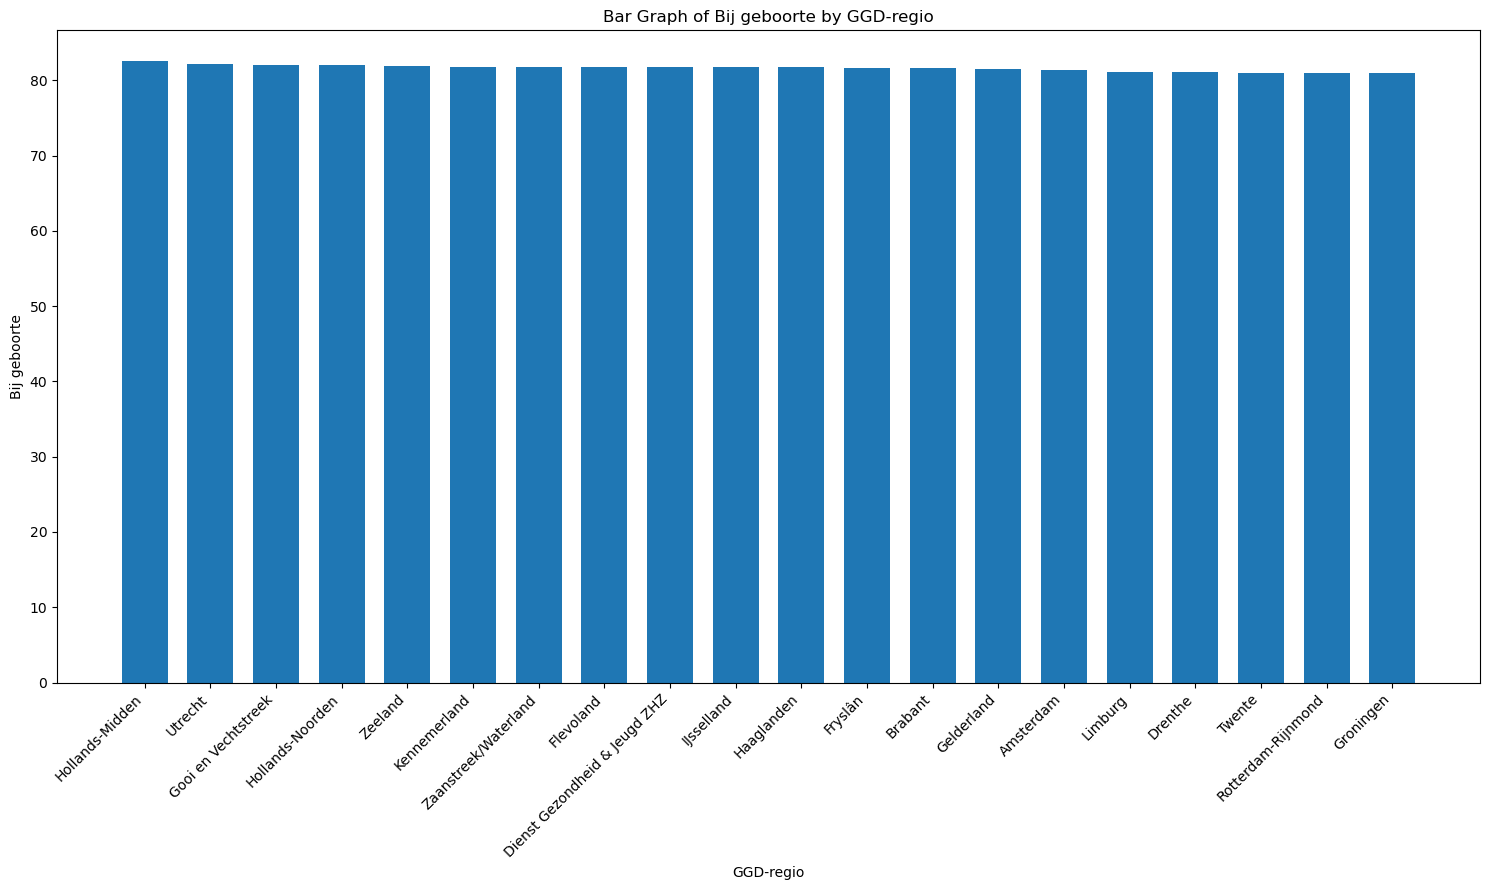

In [25]:
# Laad de dataset
Dataset4_Gem_Levensverwachting_PER_PRO = pd.read_csv('klik_lv_ggd_20192022.csv', sep=';')

# Filter de rijen waar de kolom 'Geslacht' 'Totaal' is
filtered_Dataset4_Gem_Levensverwachting_PER_PRO = Dataset4_Gem_Levensverwachting_PER_PRO[Dataset4_Gem_Levensverwachting_PER_PRO['Geslacht'] == 'Totaal'].copy()

# Verwijder de kolom 'id' als deze bestaat
if 'id' in filtered_Dataset4_Gem_Levensverwachting_PER_PRO.columns:
    filtered_Dataset4_Gem_Levensverwachting_PER_PRO.drop(columns=['id'], inplace=True)

# Verwijder de kolommen 'Afwijking bij geboorte' en 'Afwijking bij 65 jaar'
filtered_Dataset4_Gem_Levensverwachting_PER_PRO.drop(columns=['Afwijking bij geboorte', 'Afwijking bij 65 jaar'], inplace=True)

# Vervang komma's door punten en zorg ervoor dat de kolommen numerieke waarden bevatten
filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij geboorte'] = filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij geboorte'].str.replace(',', '.')
filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij geboorte'] = pd.to_numeric(filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij geboorte'], errors='coerce')

filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij 65 jaar'] = filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij 65 jaar'].str.replace(',', '.')
filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij 65 jaar'] = pd.to_numeric(filtered_Dataset4_Gem_Levensverwachting_PER_PRO['Bij 65 jaar'], errors='coerce')

# Mapping van namen naar hun bijbehorende links
mapping = {
    'Groningen': ['GGD Groningen'],
    'Drenthe': ['GGD Drenthe'],
    'IJsselland': ['GGD IJsselland'],
    'Twente': ['GGD Twente'],
    'Gelderland': ['GGD Noord- en Oost-Gelderland', 'Veiligheids- en Gezondheidsregio Gelderland-Midden', 'GGD Gelderland-Zuid'],
    'Flevoland': ['GGD Flevoland'],
    'Utrecht': ['GGD Regio Utrecht'],
    'Hollands-Noorden': ['GGD Hollands-Noorden'],
    'Kennemerland': ['GGD Kennemerland'],
    'Amsterdam': ['GGD Amsterdam'],
    'Gooi en Vechtstreek': ['GGD Gooi en Vechtstreek'],
    'Hollands-Midden': ['GGD Hollands-Midden'],
    'Rotterdam-Rijnmond': ['GGD Rotterdam-Rijnmond'],
    'Dienst Gezondheid & Jeugd ZHZ': ['Dienst Gezondheid & Jeugd ZHZ'],
    'Zeeland': ['GGD Zeeland'],
    'Brabant': ['GGD West-Brabant', 'GGD Hart voor Brabant', 'GGD Brabant-Zuidoost'],
    'Limburg': ['GGD Limburg-Noord', 'GGD Zuid-Limburg'],
    'Haaglanden': ['GGD Haaglanden'],
    'Fryslân': ['GGD Fryslân'],
    'Zaanstreek/Waterland': ['GGD Zaanstreek/Waterland']
}

# Maak een nieuwe DataFrame om de gemiddelde waarden op te slaan
average_df = pd.DataFrame(columns=filtered_Dataset4_Gem_Levensverwachting_PER_PRO.columns)

# Bereken het gemiddelde voor de kolommen 'Bij geboorte' en 'Bij 65 jaar' voor elke match en voeg toe aan average_df
for key, values in mapping.items():
    mask = filtered_Dataset4_Gem_Levensverwachting_PER_PRO['GGD-regio'].isin(values)
    avg_row = filtered_Dataset4_Gem_Levensverwachting_PER_PRO.loc[mask].mean(numeric_only=True)
    avg_row['GGD-regio'] = key
    avg_row['Geslacht'] = 'Totaal'
    average_df = pd.concat([average_df, avg_row.to_frame().T], ignore_index=True)

# Definieer de vergelijkingswaarden
value_2021 = 81.35
value_2022 = 81.50  # Example value, replace with the actual value for 2022

# Maak een nieuwe kolom voor de tekst
average_df['invergleiking met 2022'] = average_df['Bij geboorte'].apply(
    lambda x: f"{'beter dan het landelijke gemiddelde van 2022' if x > value_2022 else 'lager dan het landelijke gemiddelde van 2022'}"
)

# Maak een nieuwe kolom voor de tekst
average_df['invergleiking met 2021'] = average_df['Bij geboorte'].apply(
    lambda x: f"{'beter dan het landelijke gemiddelde van 2021' if x > value_2021 else 'lager dan het landelijke gemiddelde van 2021'}"
)

# Sort the data in descending order based on 'Bij geboorte'
sorted_data = average_df.sort_values(by='Bij geboorte', ascending=False)

# Plot the 'Bij geboorte' column with 'GGD-regio' on the x-axis
plt.figure(figsize=(15, 9))
plt.bar(sorted_data['GGD-regio'], sorted_data['Bij geboorte'], width=0.7)
plt.xlabel('GGD-regio')
plt.ylabel('Bij geboorte')
plt.title('Bar Graph of Bij geboorte by GGD-regio')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Directory to save plots
save_dir = r'C:\Users\tiror\data analitics\jaar 1\blok 3\werkplaats blok 3'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the plot as an image
plt.savefig(os.path.join(save_dir, 'Bij_geboorte_by_GGD_regio.png'))

# Display the plot
plt.show()

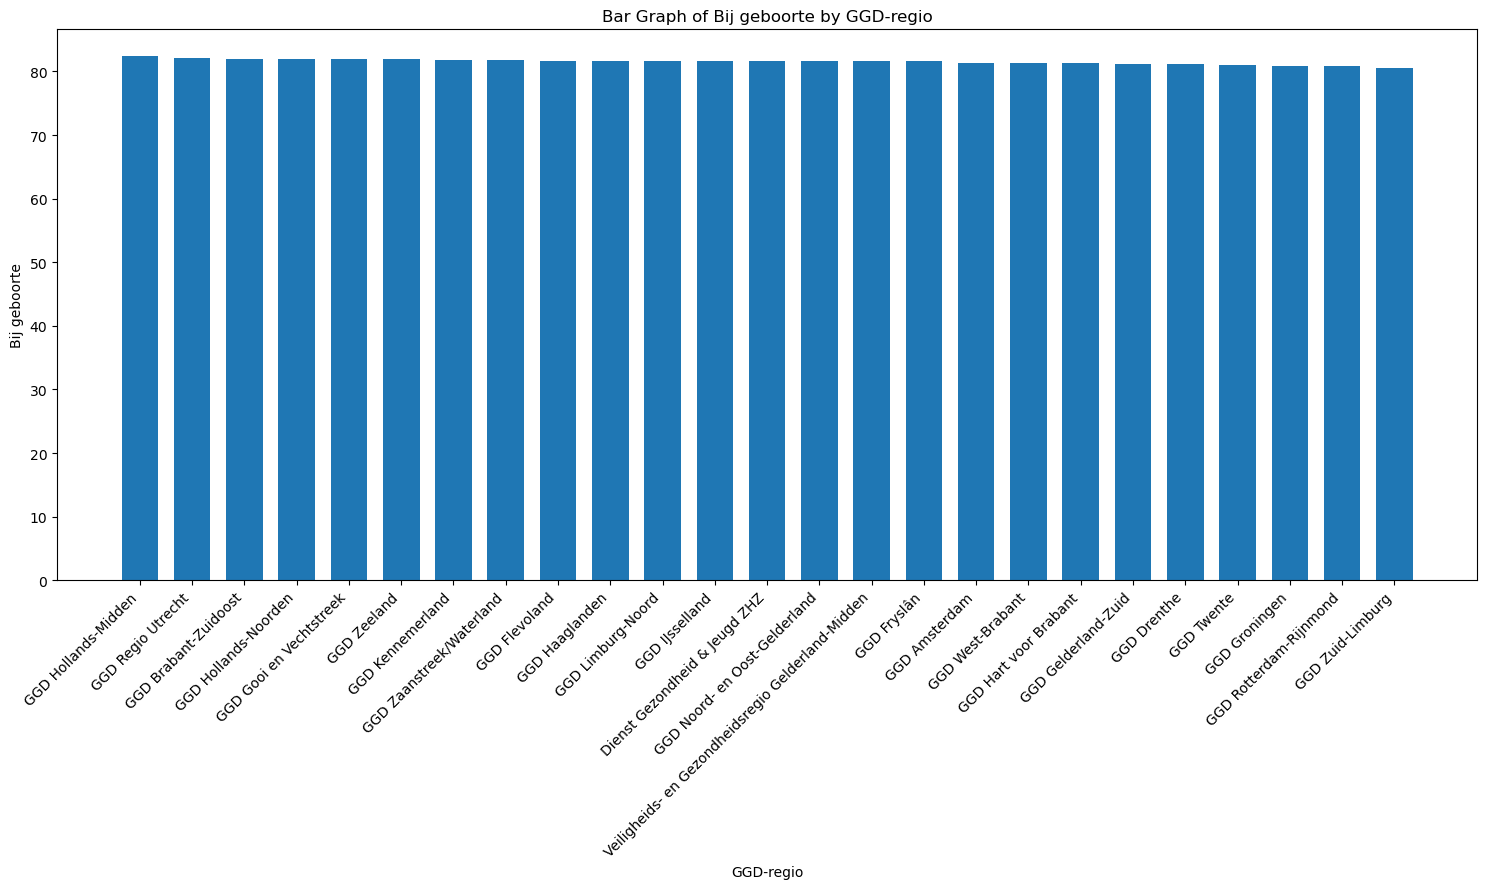

In [26]:
# Sort the data in descending order based on 'Bij geboorte'
sorted_data = filtered_Dataset4_Gem_Levensverwachting_PER_PRO.sort_values(by='Bij geboorte', ascending=False)

# Plot the 'Bij geboorte' column with 'GGD-regio' on the x-axis
plt.figure(figsize=(15, 9))
plt.bar(sorted_data['GGD-regio'], sorted_data['Bij geboorte'], width=0.7)
plt.xlabel('GGD-regio')
plt.ylabel('Bij geboorte')
plt.title('Bar Graph of Bij geboorte by GGD-regio')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Directory to save plots
save_dir = r'C:\Users\tiror\data analitics\jaar 1\blok 3\werkplaats blok 3'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the plot as an image
plt.savefig(os.path.join(save_dir, 'Bij_geboorte_by_GGD_regio.png'))

# Display the plot
plt.show()

In [27]:
# Dataset 5

In [28]:
# Laad de dataset
Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250 = pd.read_csv('Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250 (1).csv', decimal=',' ,sep=';')

In [29]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset5_inkomen_huishoudens.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250.to_sql('Dataset5_table', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


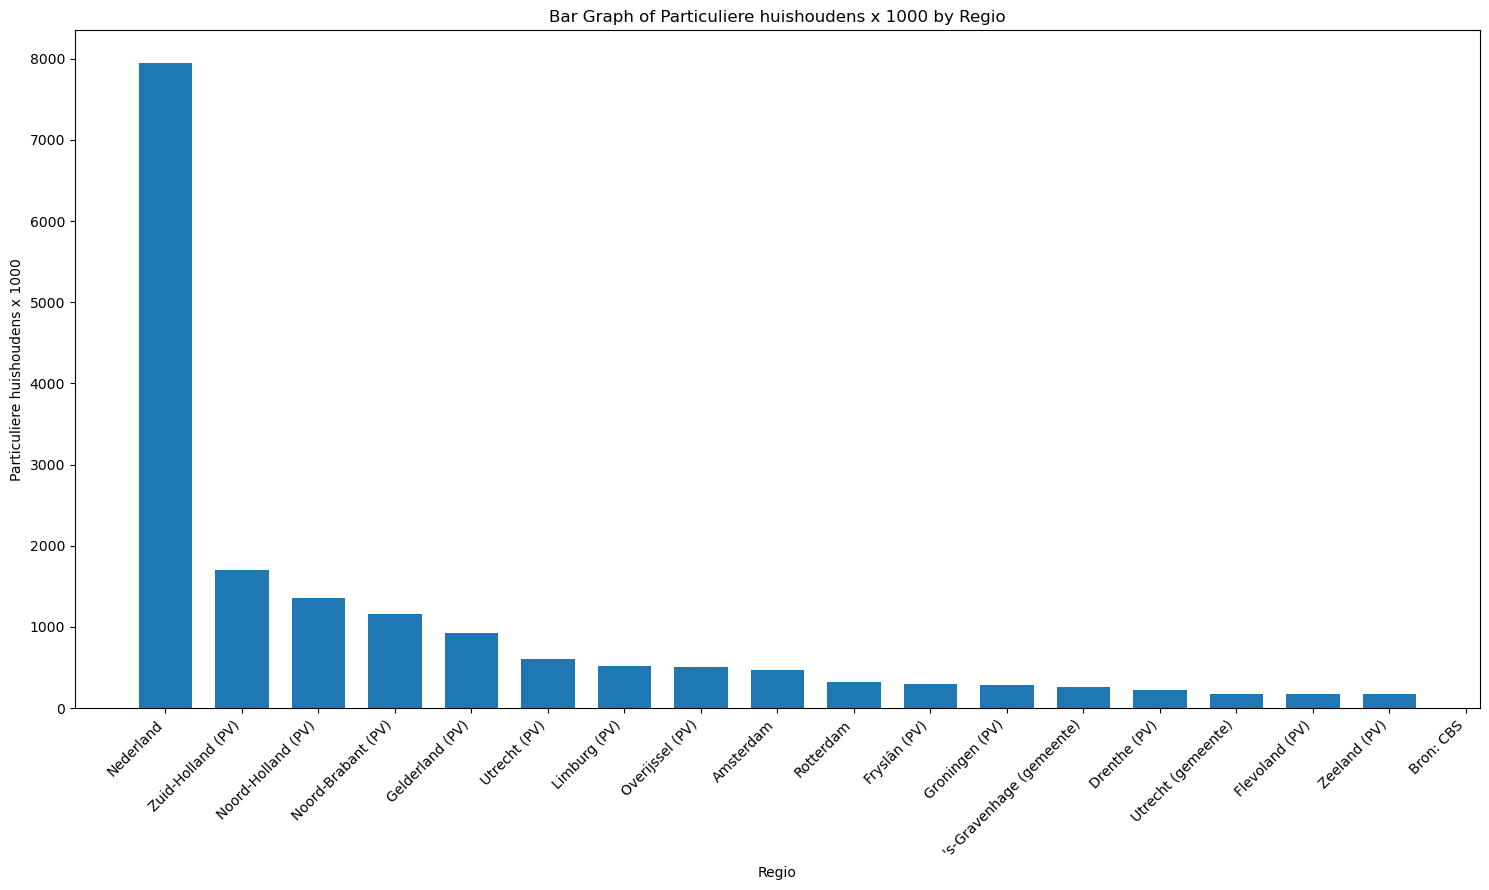

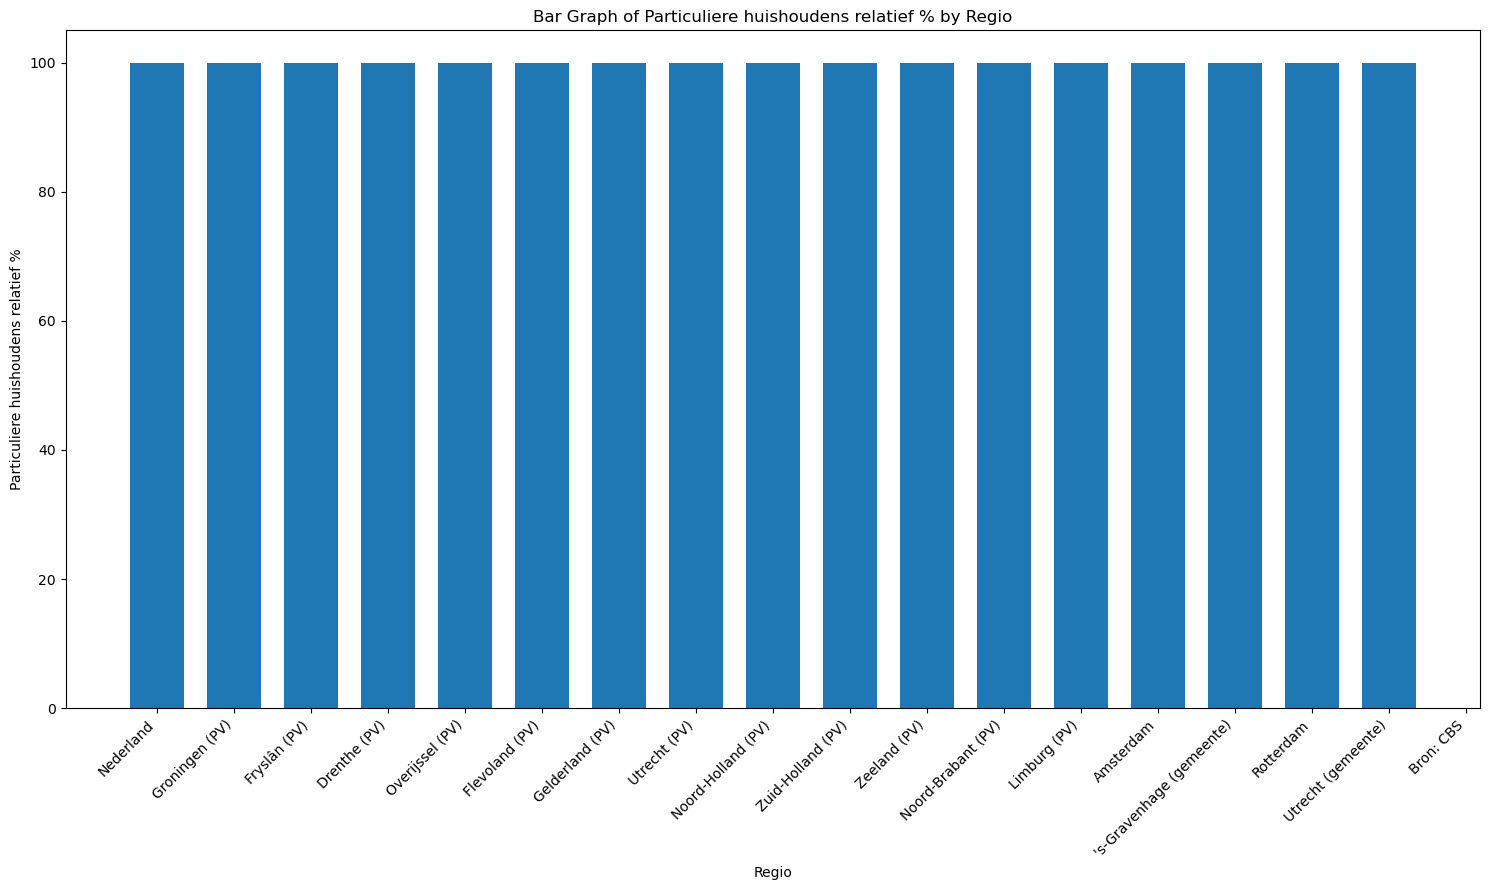

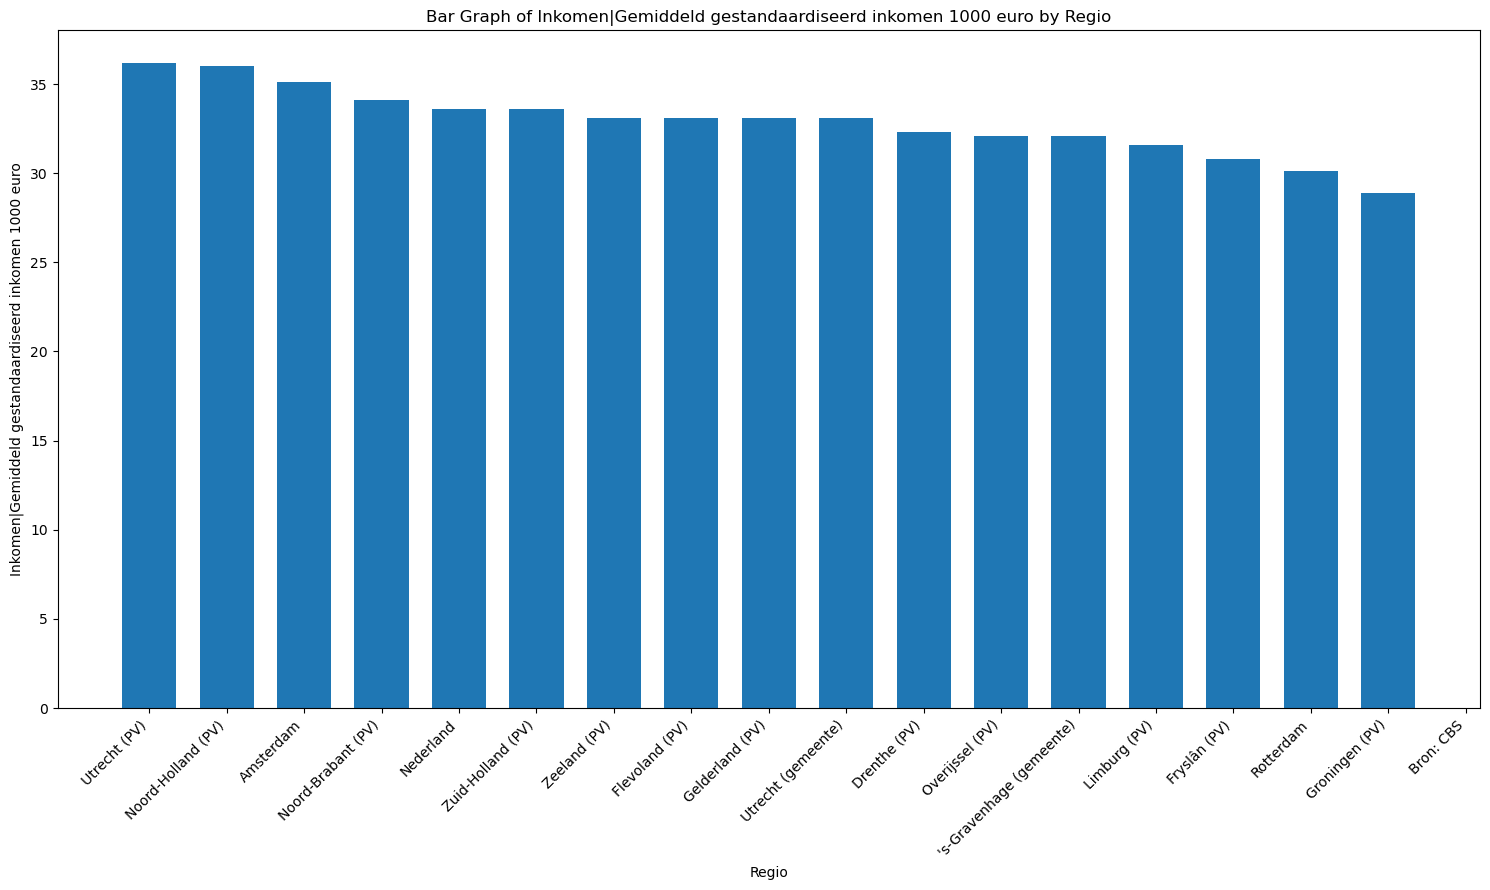

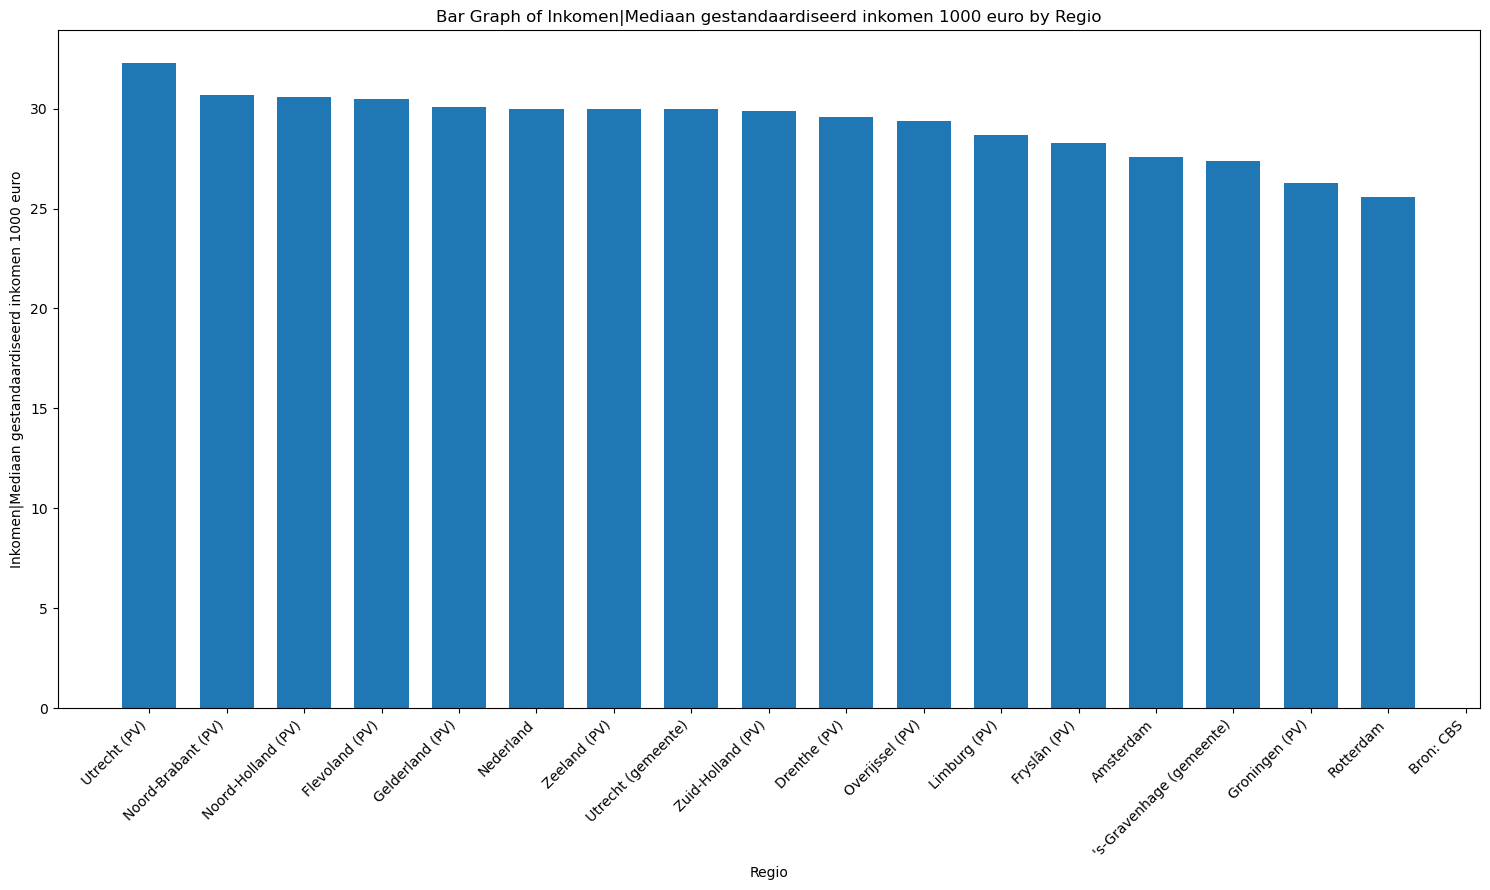

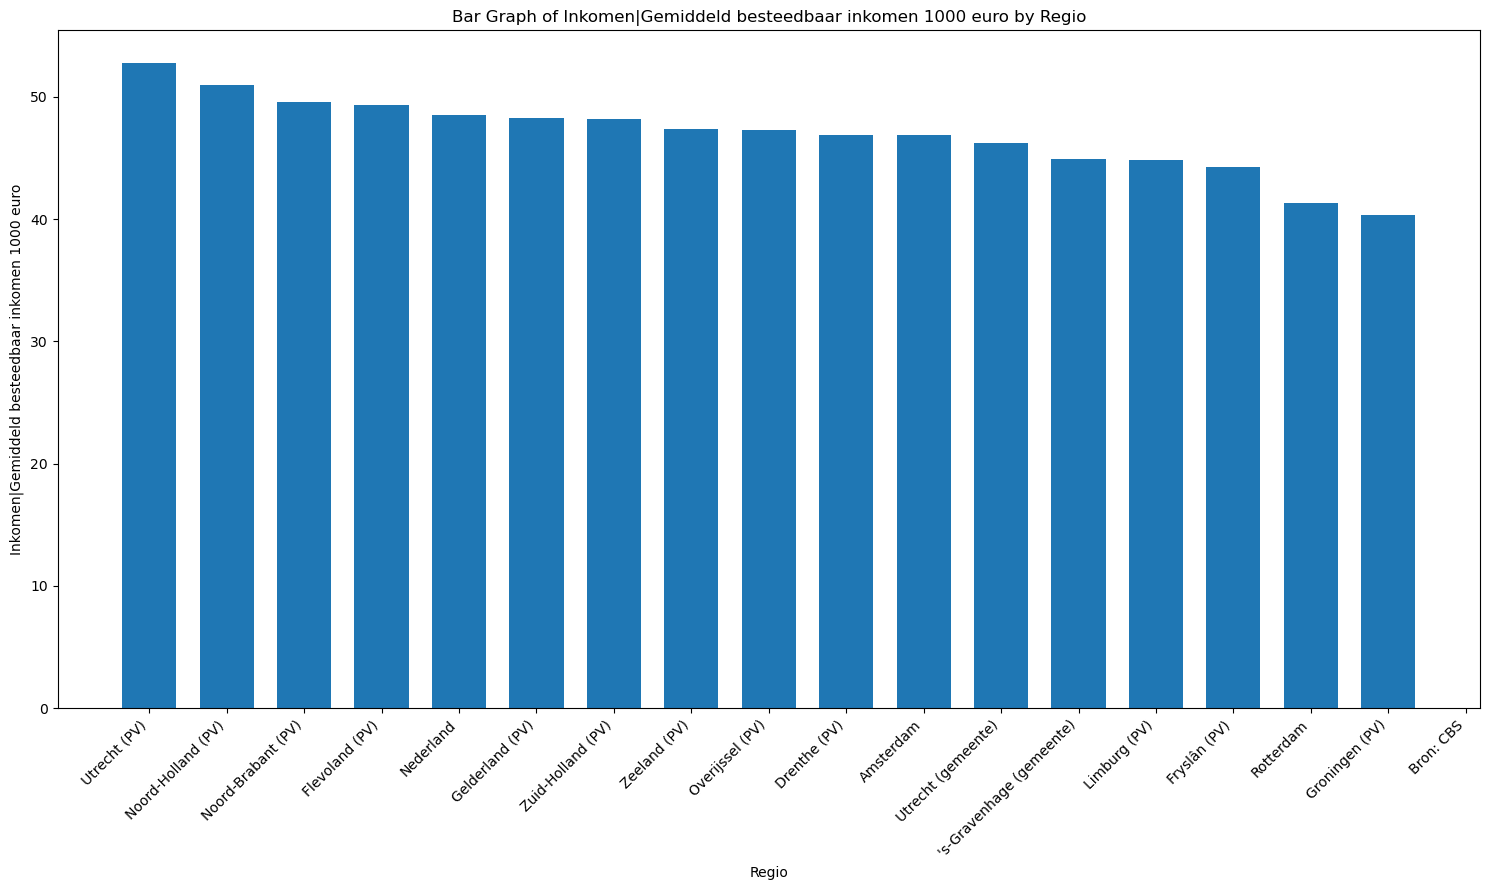

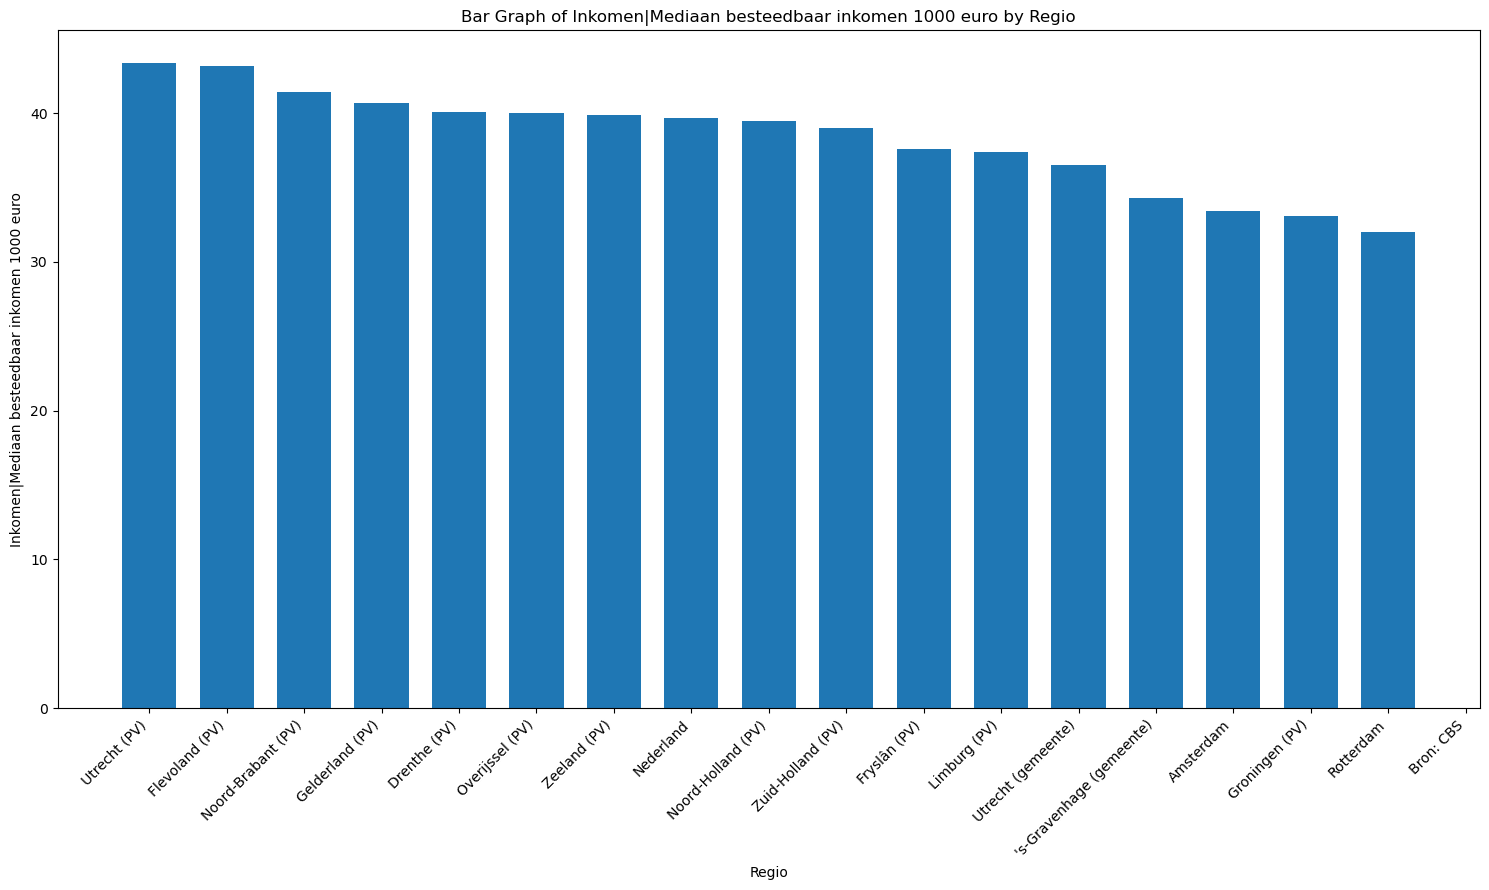

In [30]:
# Laad de dataset
Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250 = pd.read_csv('Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250 (1).csv', decimal=',', sep=';')

# List of columns to plot
columns_to_plot = [
    'Particuliere huishoudens x 1000',
    'Particuliere huishoudens relatief %',
    'Inkomen|Gemiddeld gestandaardiseerd inkomen 1000 euro',
    'Inkomen|Mediaan gestandaardiseerd inkomen 1000 euro',
    'Inkomen|Gemiddeld besteedbaar inkomen 1000 euro',
    'Inkomen|Mediaan besteedbaar inkomen 1000 euro'
]

# Convert columns to numeric, if necessary
for column in columns_to_plot:
    Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250[column] = pd.to_numeric(Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250[column], errors='coerce')

# Directory to save plots
save_dir = r'C:\Users\tiror\data analitics\jaar 1\blok 3\werkplaats blok 3'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Function to create a safe filename
def create_safe_filename(column_name):
    return column_name.replace('/', '_').replace('|', '_').replace('<', '_').replace('>', '_').replace('=', '_')

# Plot each column as a separate bar graph with x-axis labels rotated 45 degrees
for column in columns_to_plot:
    # Sort the data in descending order
    sorted_data = Dataset5_Inkomen_van_huishoudens__huishoudenskenmerken__regio__indeling_2023__22012025_150250.sort_values(by=column, ascending=False)
    
    plt.figure(figsize=(15, 9))
    plt.bar(sorted_data['Regio'], sorted_data[column], width=0.7)  # Adjust width here
    plt.xlabel('Regio')
    plt.ylabel(column)
    plt.title(f'Bar Graph of {column} by Regio')
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust font size and alignment here
    plt.tight_layout()  # Adjust layout to fit labels
    
    # Create a safe filename
    safe_column_name = create_safe_filename(column)
    plt.savefig(os.path.join(save_dir, f'{safe_column_name}.png'))  # Save the plot with the column name as the filename

# Display all plots
plt.show()

In [31]:
# Dataset 6

In [32]:
# Laad de dataset
Dataset6_Regionale_kerncijfers_Nederland = pd.read_csv('Regionale_kerncijfers_Nederland_22012025_144703.csv', sep=';')

In [33]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset6_Regionale_kerncijfers_Nederland.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset6_Regionale_kerncijfers_Nederland.to_sql('Dataset6_table', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


In [34]:
# Dataset 7 

In [35]:
# Laad de dataset
Dataset7_Hoogst_behaalde_onderwijsniveau = pd.read_csv('Hoogst_behaalde_onderwijsniveau.csv', sep=';', decimal=',')

In [36]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset7_Hoogst_behaalde_onderwijsniveau.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset7_Hoogst_behaalde_onderwijsniveau.to_sql('Dataset7_table', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


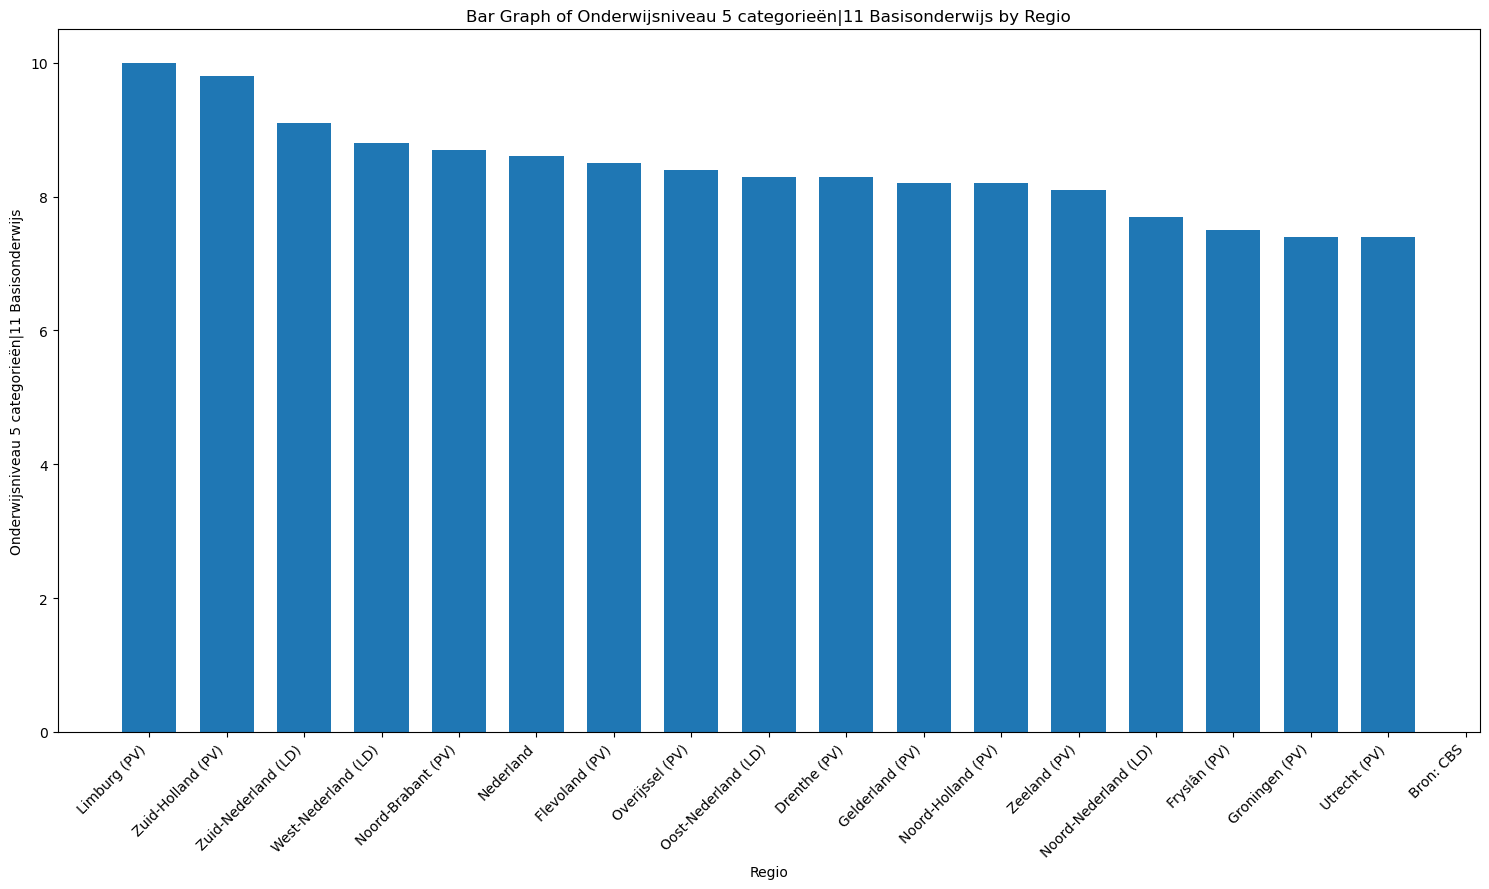

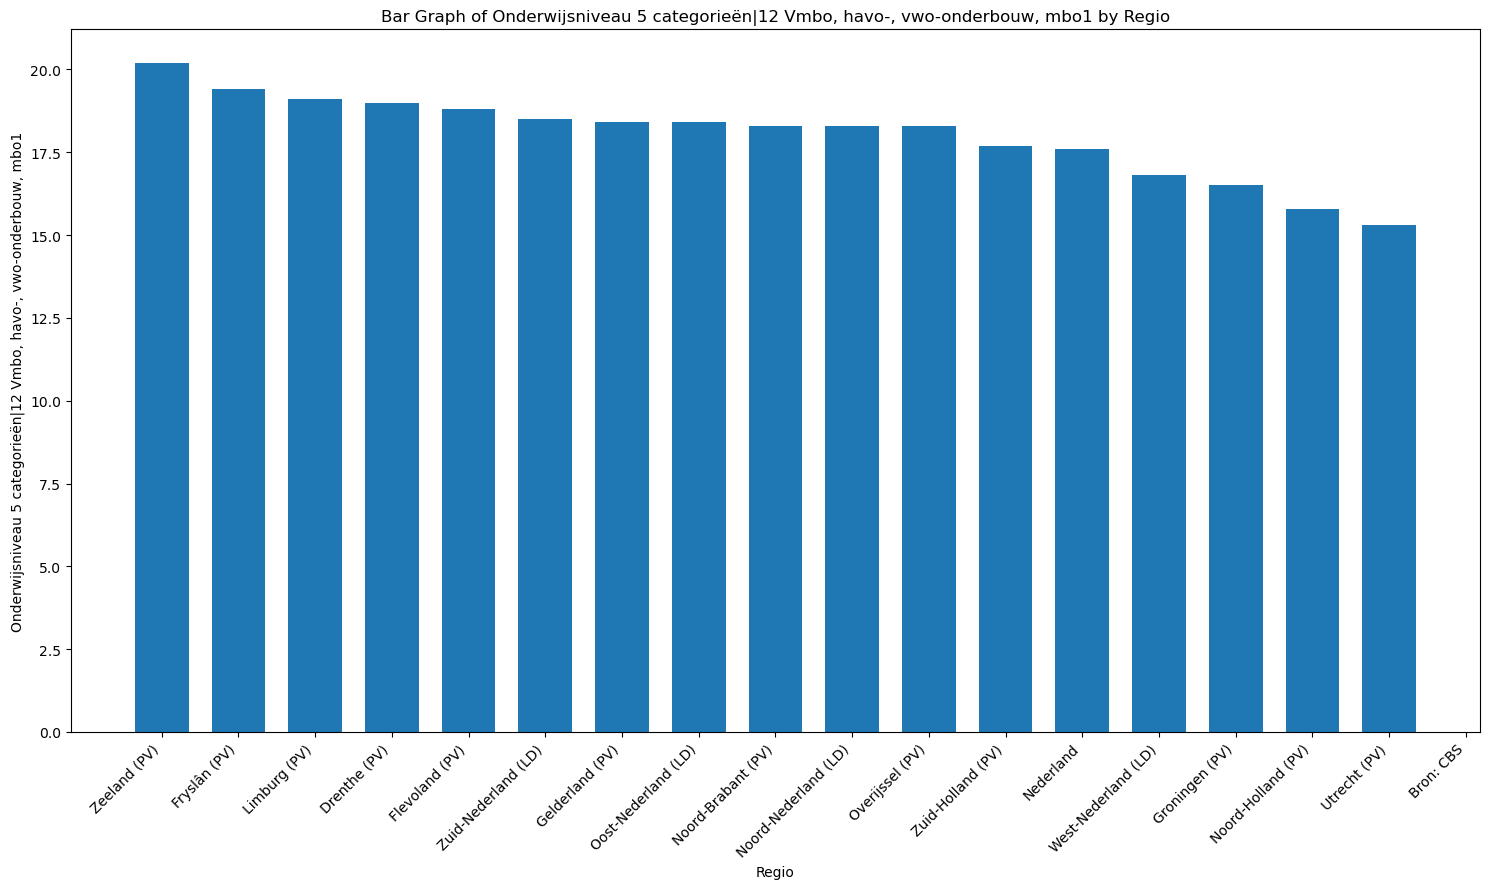

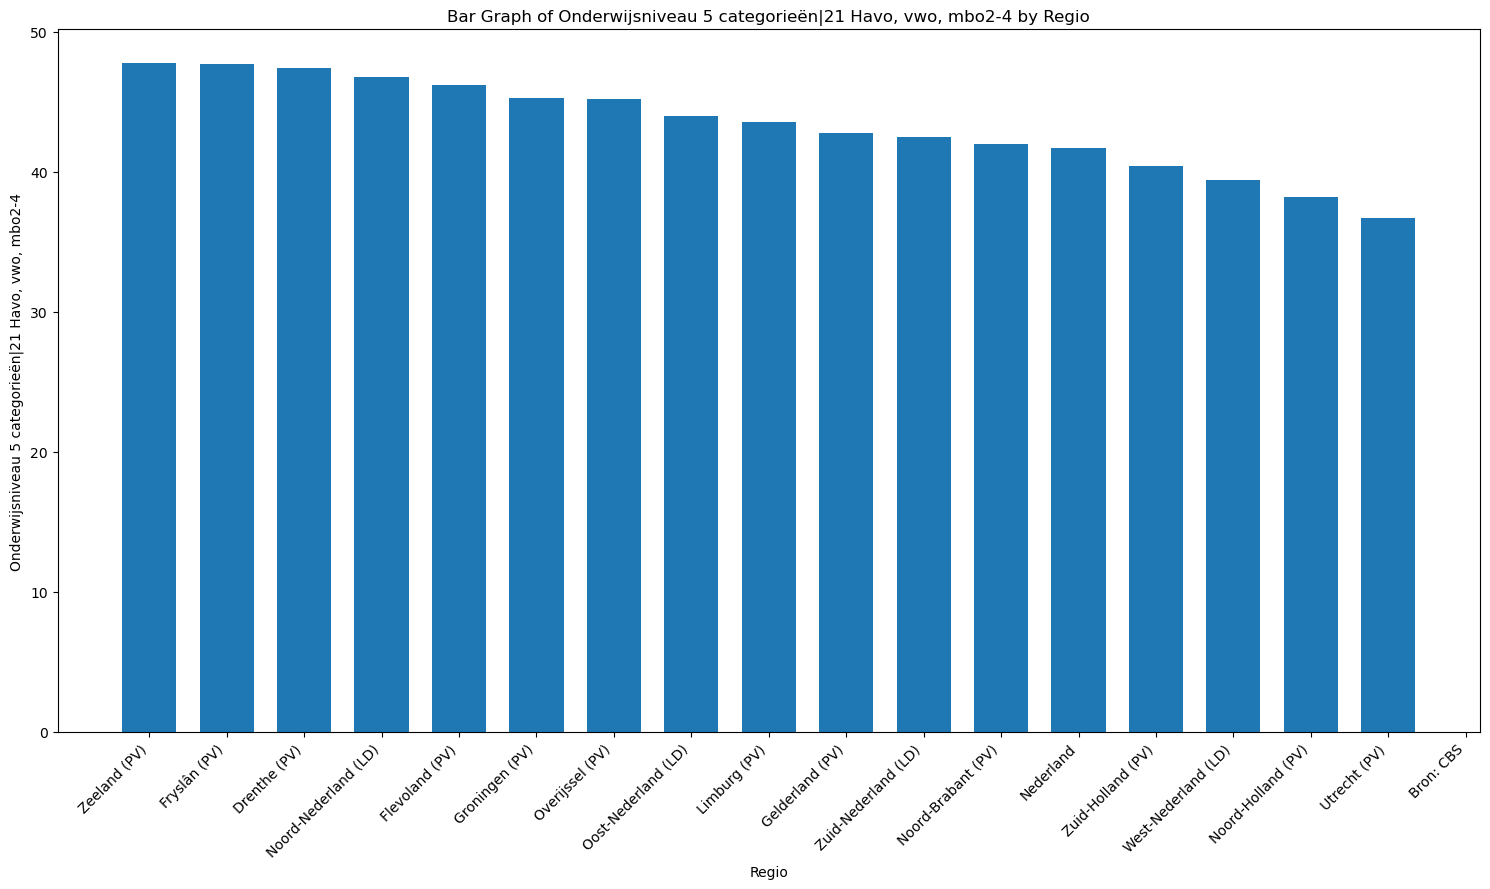

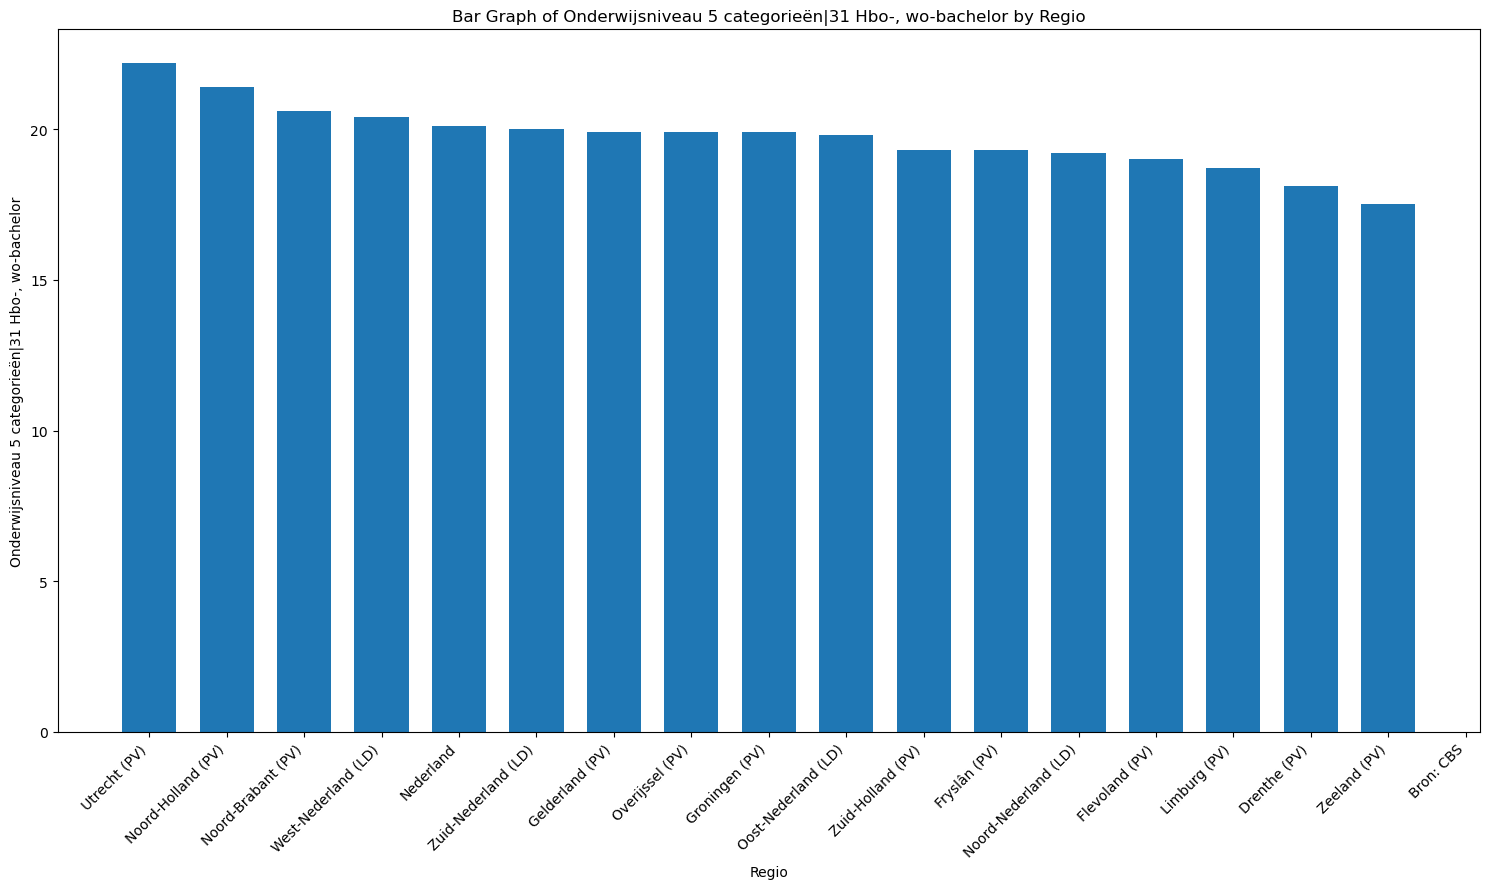

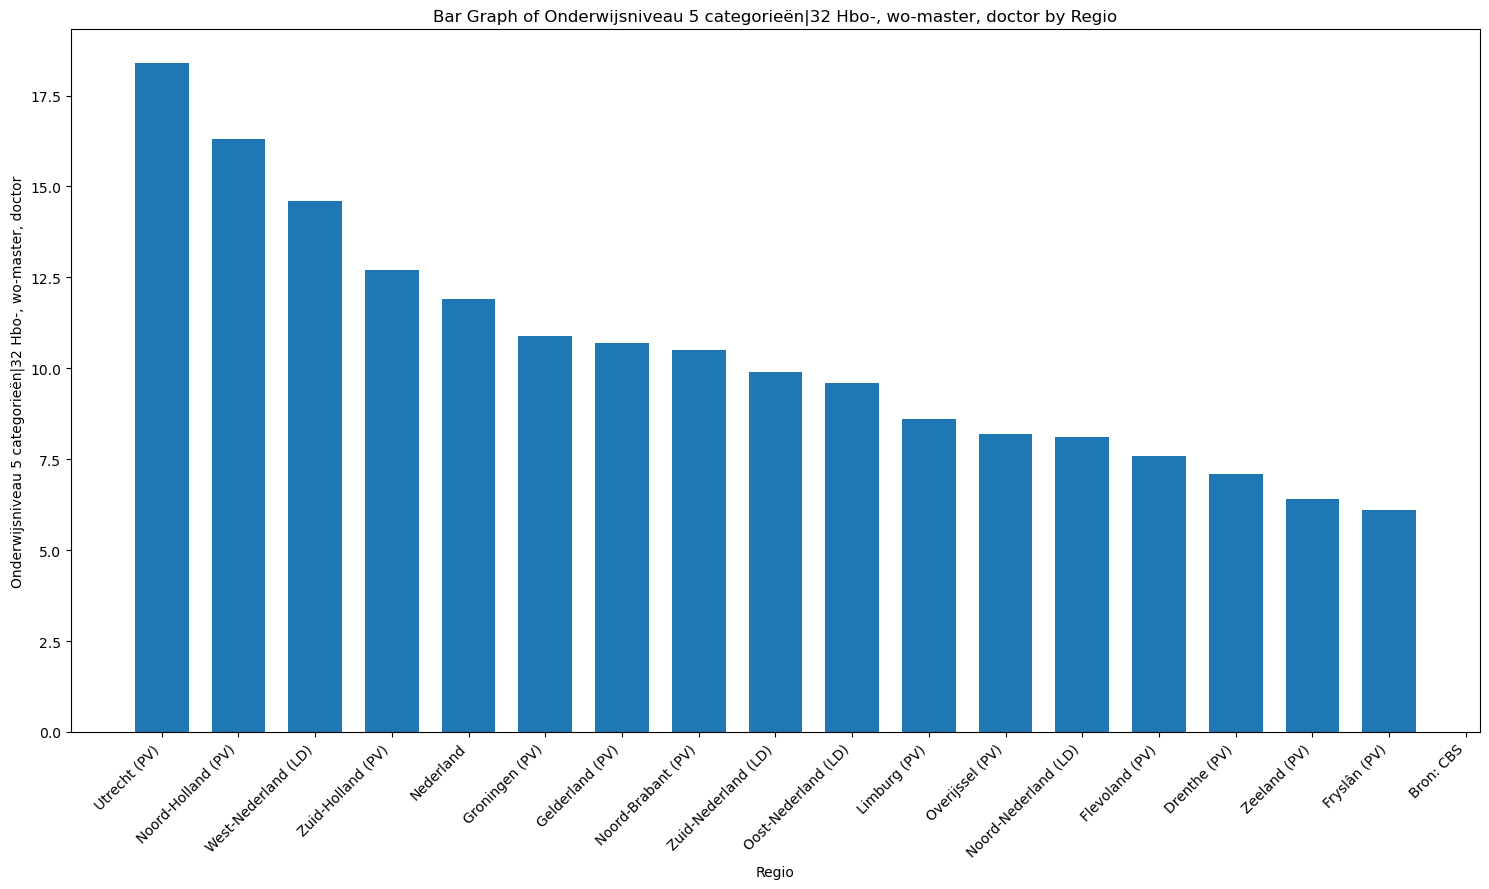

In [37]:
# List of columns to plot
columns_to_plot = [
    'Onderwijsniveau 5 categorieën|11 Basisonderwijs',
    'Onderwijsniveau 5 categorieën|12 Vmbo, havo-, vwo-onderbouw, mbo1',
    'Onderwijsniveau 5 categorieën|21 Havo, vwo, mbo2-4',
    'Onderwijsniveau 5 categorieën|31 Hbo-, wo-bachelor',
    'Onderwijsniveau 5 categorieën|32 Hbo-, wo-master, doctor'
]

# Convert columns to numeric, if necessary
for column in columns_to_plot:
    Dataset7_Hoogst_behaalde_onderwijsniveau[column] = pd.to_numeric(Dataset7_Hoogst_behaalde_onderwijsniveau[column], errors='coerce')

# Directory to save plots
save_dir = r'C:\Users\tiror\data analitics\jaar 1\blok 3\werkplaats blok 3'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Function to create a safe filename
def create_safe_filename(column_name):
    return column_name.replace('/', '_').replace('|', '_').replace('<', '_').replace('>', '_').replace('=', '_')

# Plot each column as a separate bar graph with x-axis labels rotated 45 degrees
for column in columns_to_plot:
    # Sort the data in descending order
    sorted_data = Dataset7_Hoogst_behaalde_onderwijsniveau.sort_values(by=column, ascending=False)
    
    plt.figure(figsize=(15, 9))
    plt.bar(sorted_data['Regio'], sorted_data[column], width=0.7)  # Adjust width here
    plt.xlabel('Regio')
    plt.ylabel(column)
    plt.title(f'Bar Graph of {column} by Regio')
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust font size and alignment here
    plt.tight_layout()  # Adjust layout to fit labels
    
    # Create a safe filename
    safe_column_name = create_safe_filename(column)
    plt.savefig(os.path.join(save_dir, f'{safe_column_name}.png'))  # Save the plot with the column name as the filename

# Display all plots
plt.show()

In [38]:
# dataset 8

In [39]:
# laat de dataset 
Dataset8_regionale_gezondheids_monitor= pd.read_csv('Gezondheidsmonitor__bevolking_18_jaar_of_ouder__regio__2022_22012025_151906.csv' , sep=';', decimal=',')

In [40]:
# Maak verbinding met een SQLite-database (of maak deze aan als deze niet bestaat)
conn = sqlite3.connect('Dataset8_gezondheidmonitor_bevolking_18jaar.db')

# Zet de DataFrame om naar een SQL-tabel
Dataset8_regionale_gezondheids_monitor.to_sql('Dataset8_table', conn, if_exists='replace', index=False)

# Commit en sluit de verbinding
conn.commit()
conn.close()

print("Het CSV-bestand is succesvol omgezet naar een SQL-database.")

Het CSV-bestand is succesvol omgezet naar een SQL-database.


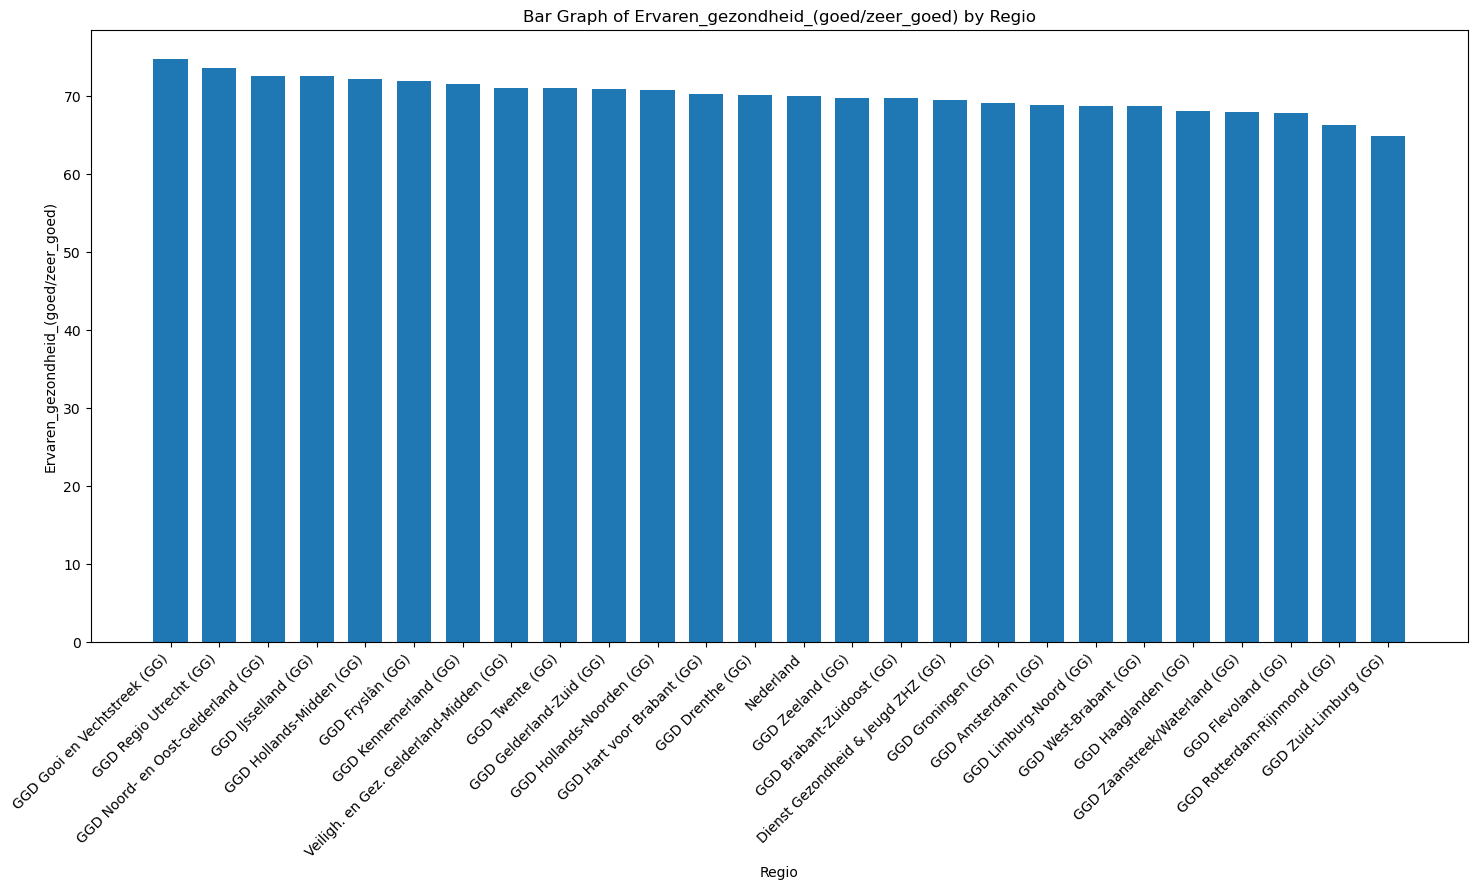

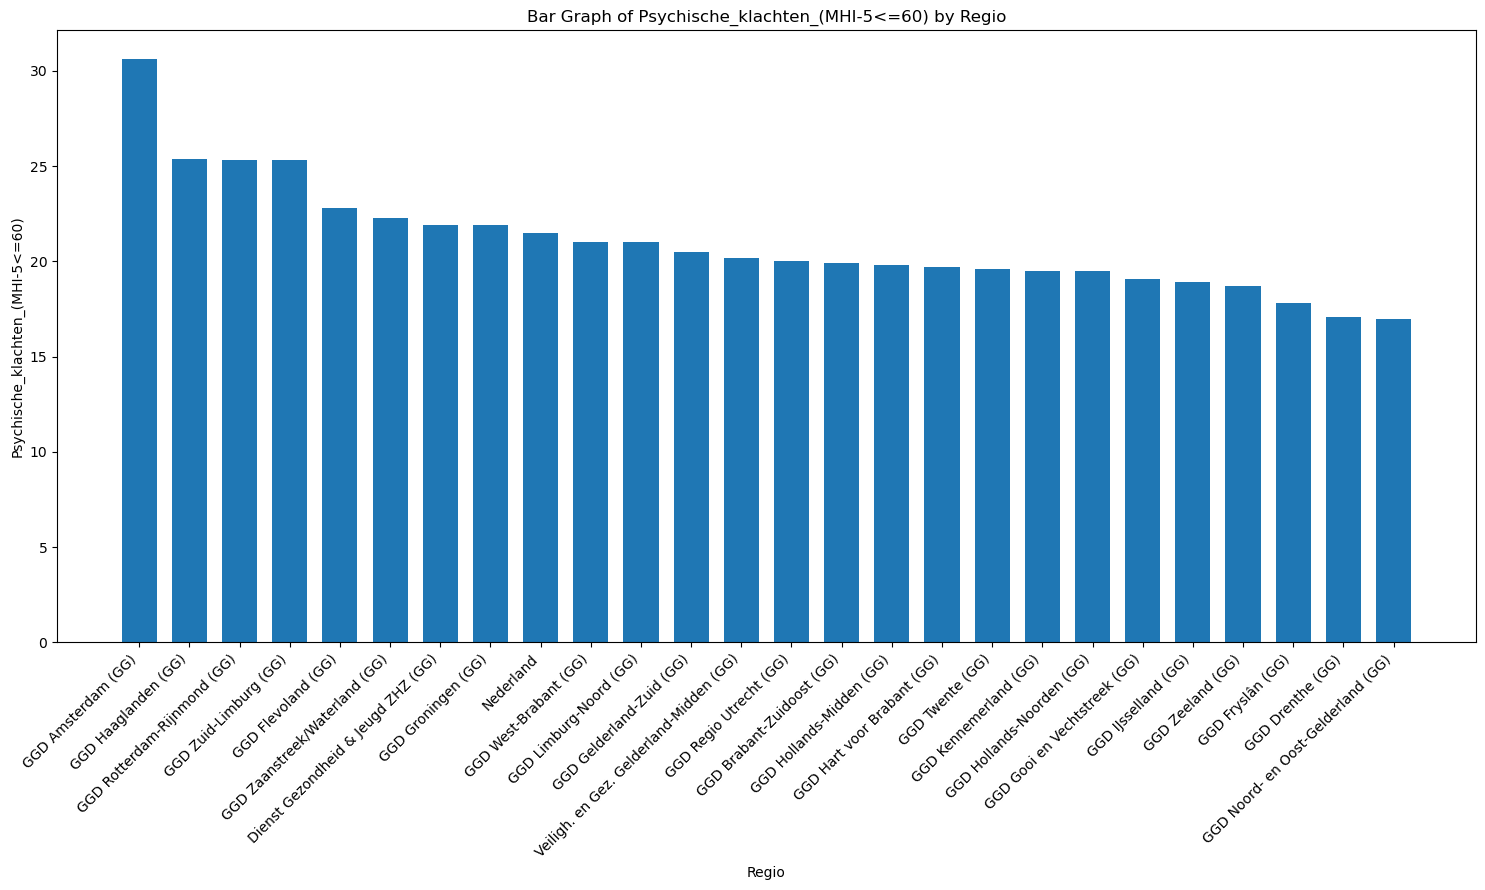

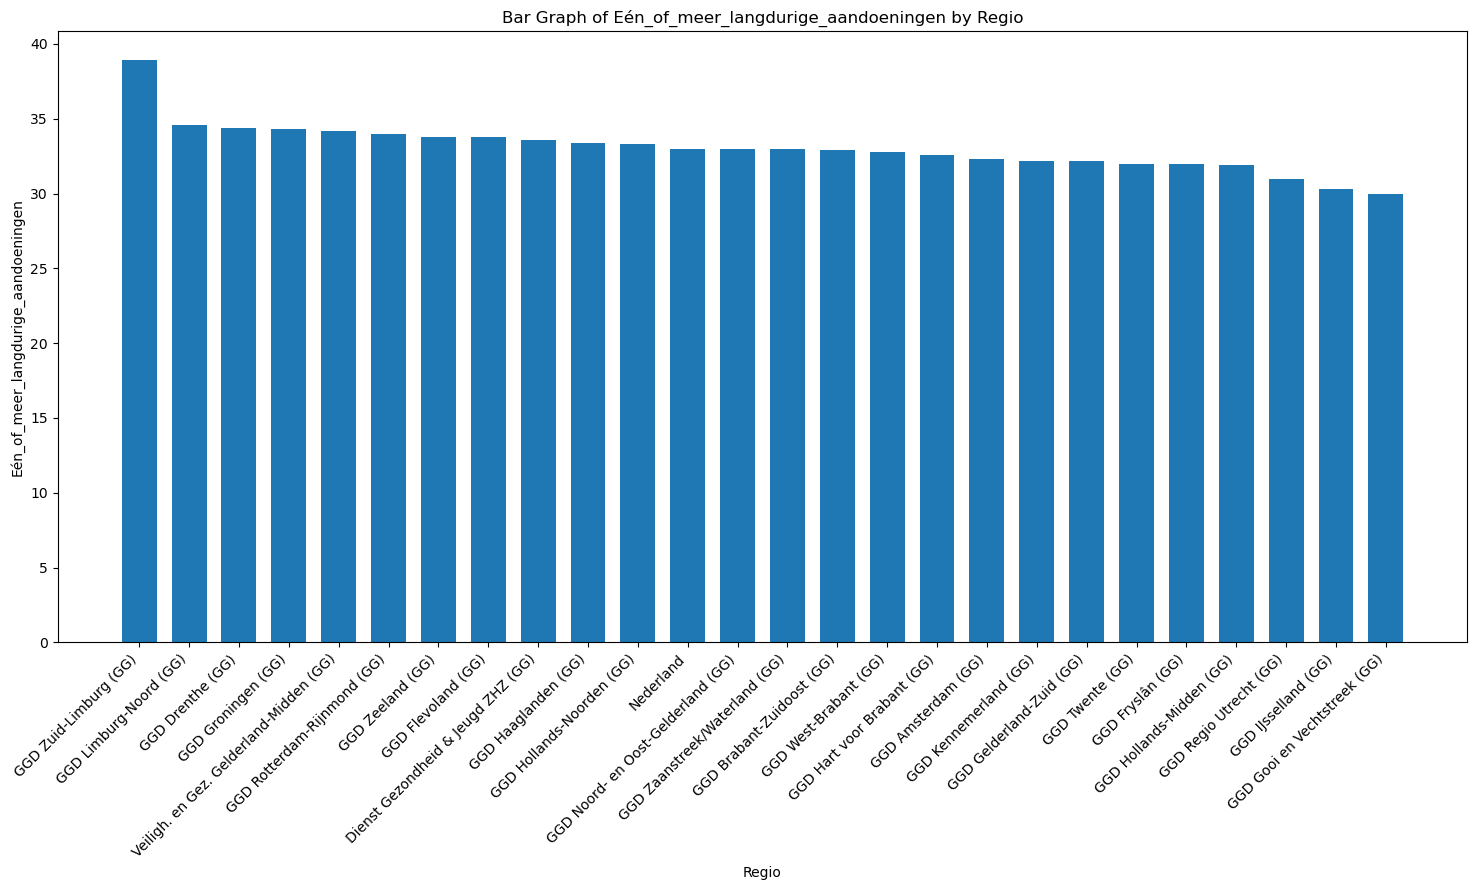

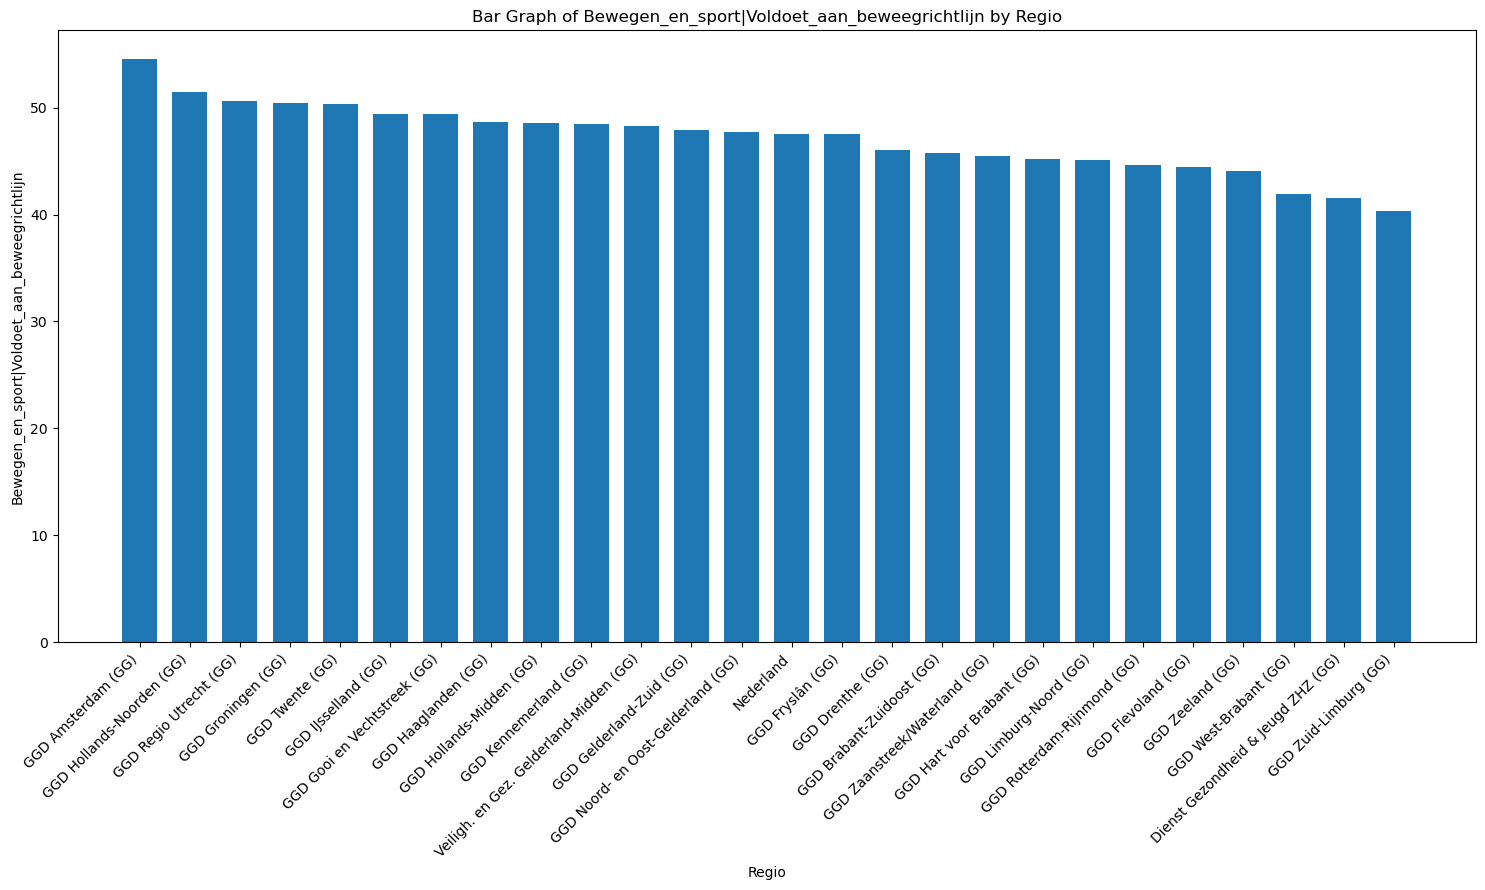

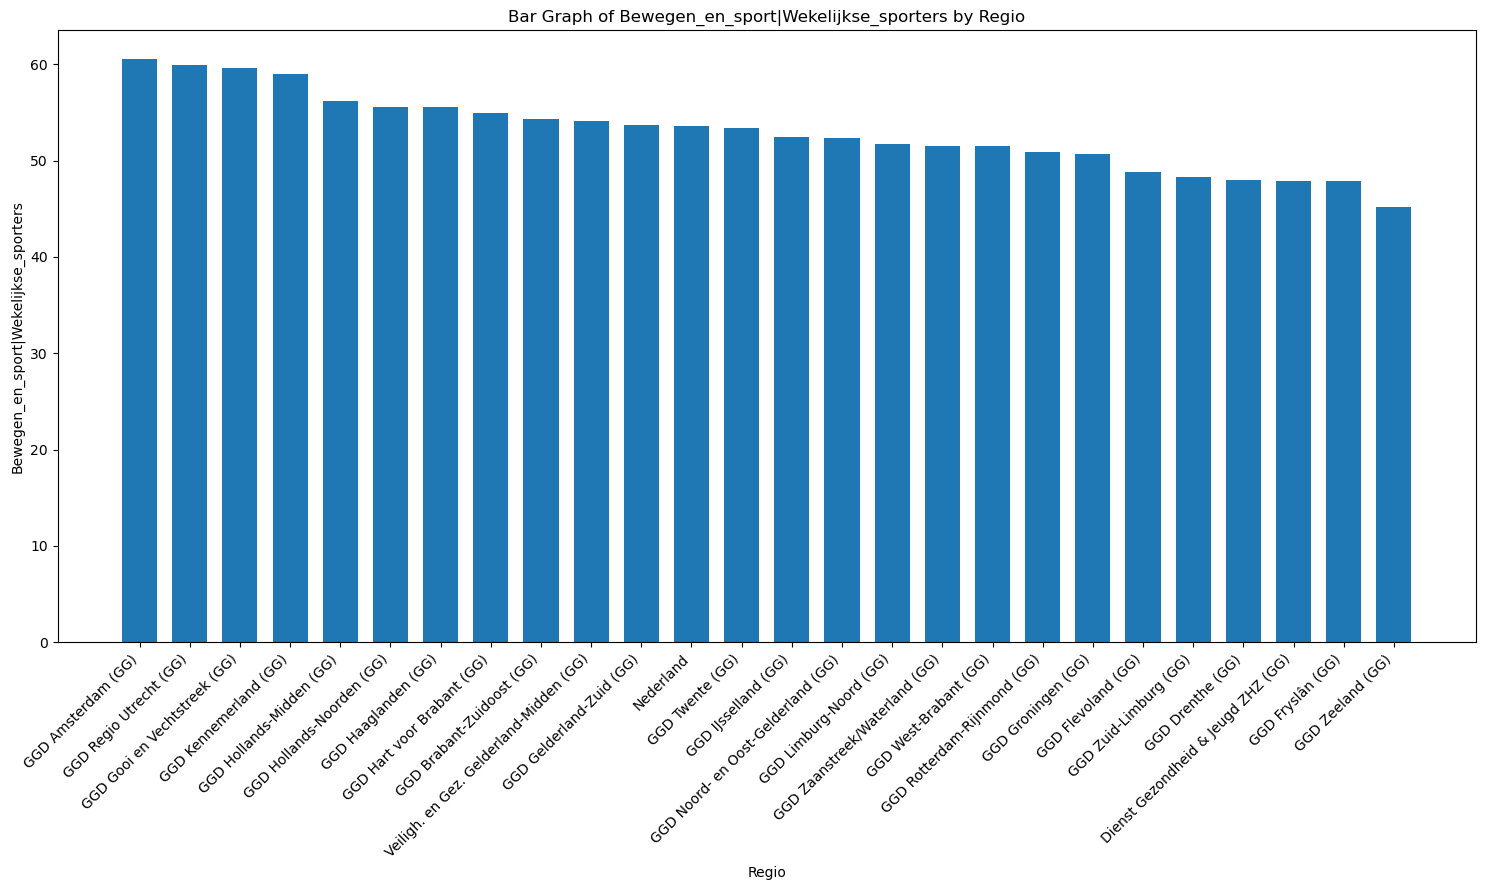

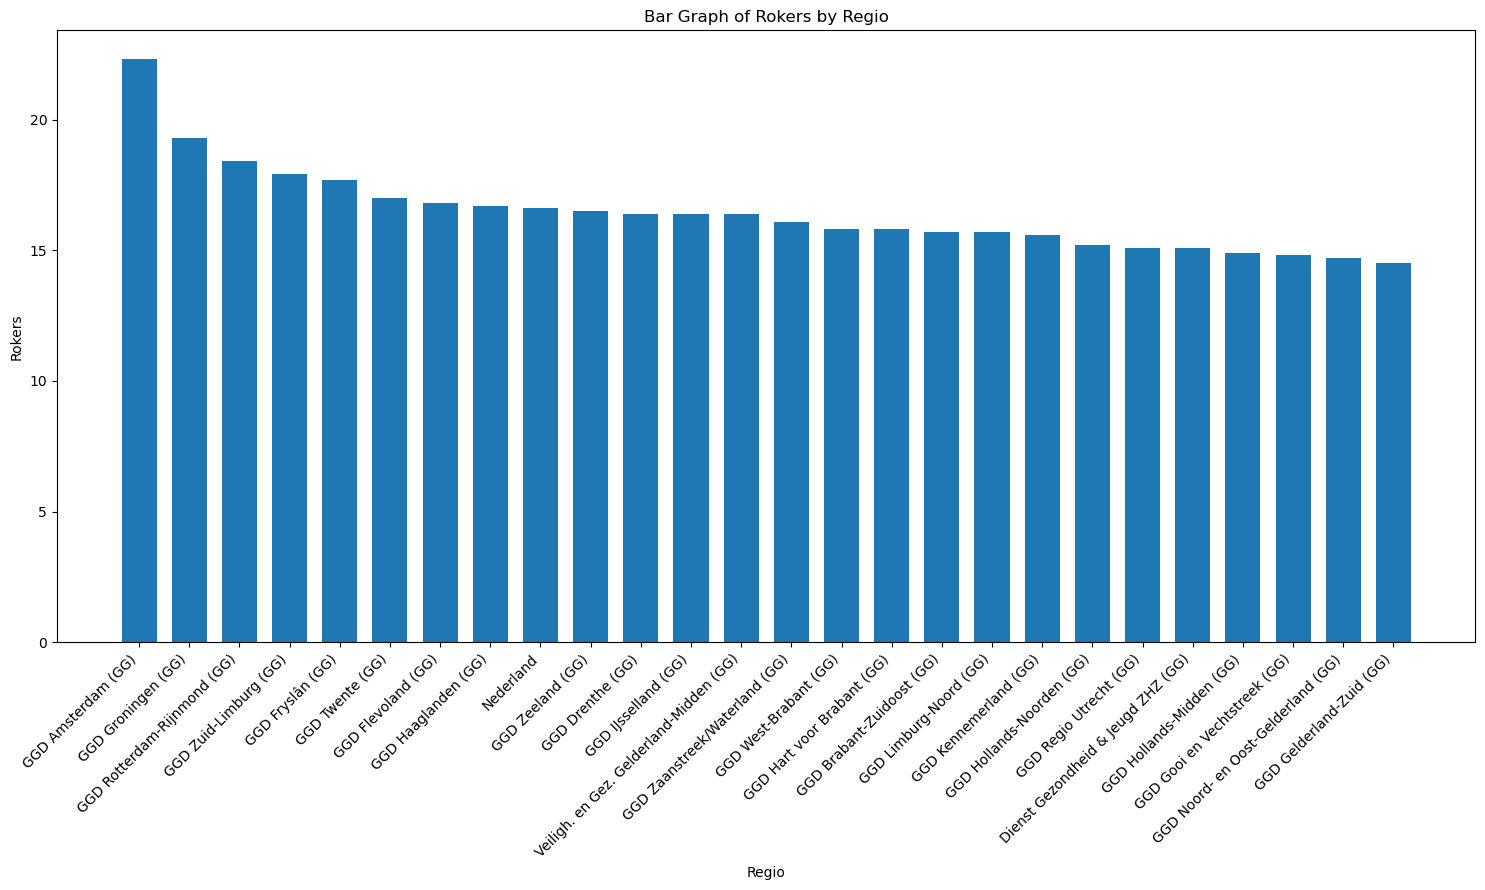

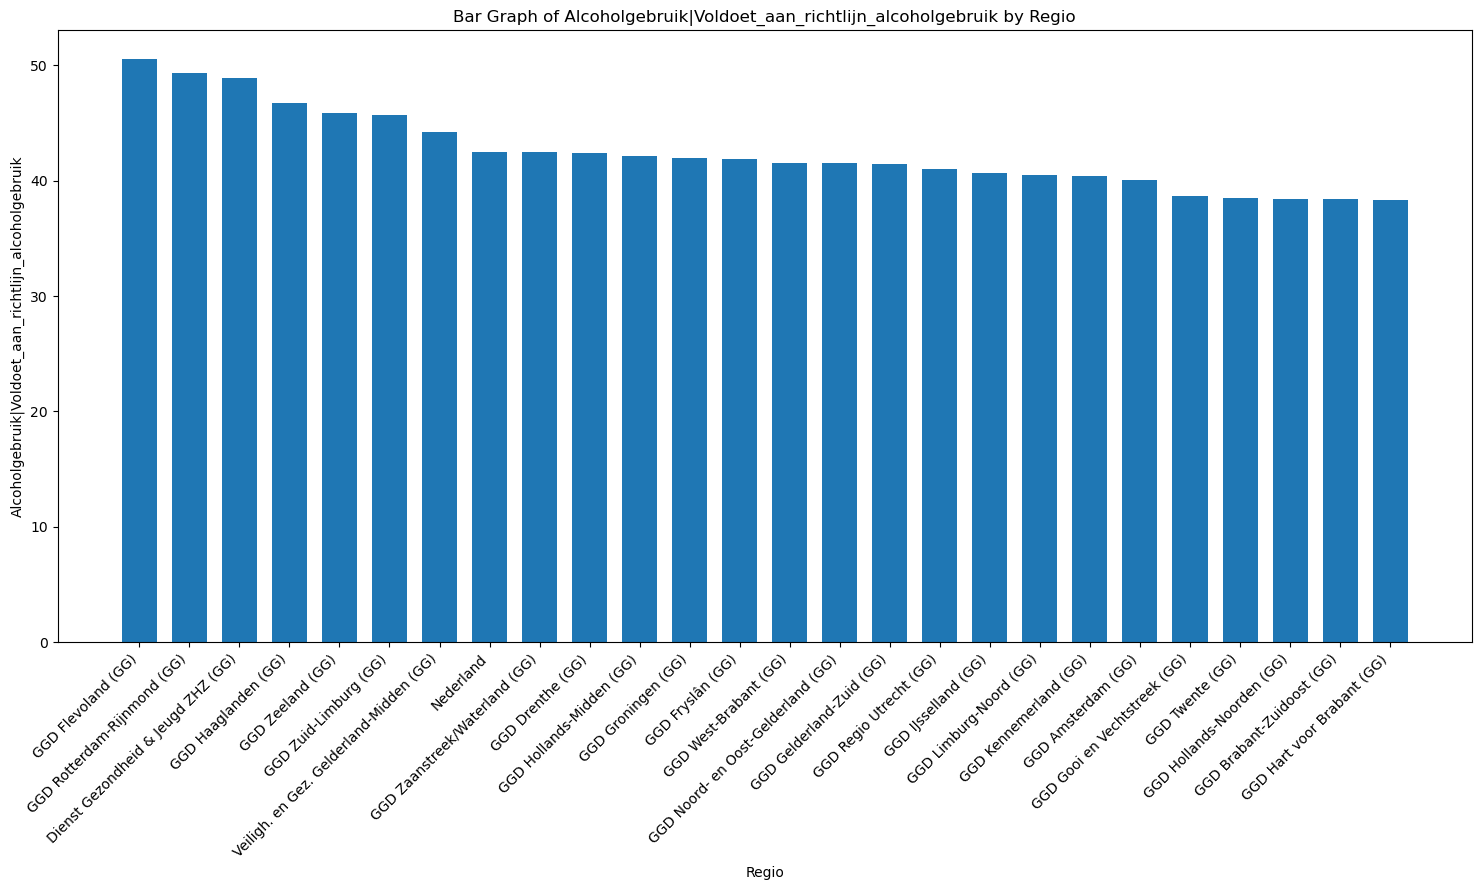

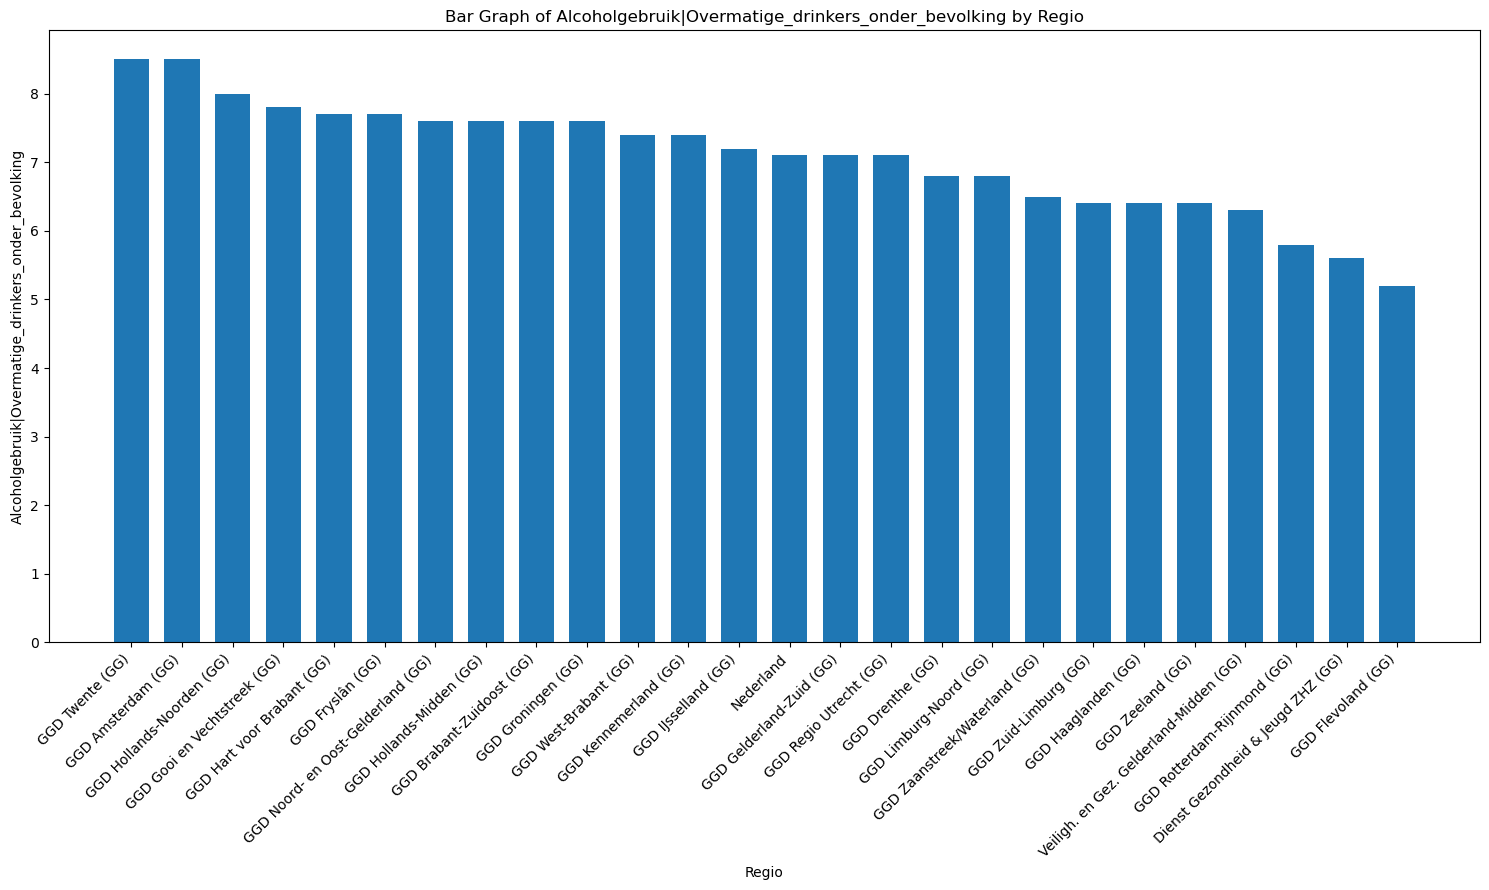

In [41]:
# List of columns to plot
columns_to_plot = [
    'Ervaren_gezondheid_(goed/zeer_goed)',
    'Psychische_klachten_(MHI-5<=60)',
    'Eén_of_meer_langdurige_aandoeningen',
    'Bewegen_en_sport|Voldoet_aan_beweegrichtlijn',
    'Bewegen_en_sport|Wekelijkse_sporters',
    'Rokers',
    'Alcoholgebruik|Voldoet_aan_richtlijn_alcoholgebruik',
    'Alcoholgebruik|Overmatige_drinkers_onder_bevolking'
]

# Convert columns to numeric, if necessary
for column in columns_to_plot:
    Dataset8_regionale_gezondheids_monitor[column] = pd.to_numeric(Dataset8_regionale_gezondheids_monitor[column], errors='coerce')

# Directory to save plots
save_dir = r'C:\Users\tiror\data analitics\jaar 1\blok 3\werkplaats blok 3'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Function to create a safe filename
def create_safe_filename(column_name):
    return column_name.replace('/', '_').replace('|', '_').replace('<', '_').replace('>', '_').replace('=', '_')

# Plot each column as a separate bar graph with x-axis labels rotated 45 degrees
for column in columns_to_plot:
    # Sort the data in descending order
    sorted_data = Dataset8_regionale_gezondheids_monitor.sort_values(by=column, ascending=False)
    
    plt.figure(figsize=(15, 9))
    plt.bar(sorted_data['Regio'], sorted_data[column], width=0.7)  # Adjust width here
    plt.xlabel('Regio')
    plt.ylabel(column)
    plt.title(f'Bar Graph of {column} by Regio')
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust font size and alignment here
    plt.tight_layout()  # Adjust layout to fit labels
    
    # Create a safe filename
    safe_column_name = create_safe_filename(column)
    plt.savefig(os.path.join(save_dir, f'{safe_column_name}.png'))  # Save the plot with the column name as the filename

# Display all plots
plt.show()